# 📊 Comprensión y Análisis Exploratorio de Datos (EDA)

## 1. Contexto

Este notebook tiene como objetivo realizar un análisis exploratorio y descriptivo del conjunto de datos, con el fin de comprender su estructura, calidad, distribución de variables y relaciones relevantes con la variable objetivo **pago_atiempo**.  

El análisis permitirá:

- Evaluar calidad de datos.
- Detectar valores nulos y atípicos.
- Identificar patrones.
- Proponer transformaciones futuras.
- Establecer reglas de validación.

---

## 2. Importación de librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Carga de datos

In [2]:
DATA_PATH = "../../Base_de_datos.xlsx"
df = pd.read_excel(DATA_PATH)

## 4. Exploración inicial

In [3]:
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (10763, 23)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
df.describe()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,...,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,...,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,...,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000
std,2.338279,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,...,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668


In [6]:
df.isnull().sum()

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64

### 4.1 Tratamiento de nulos

In [7]:
df = df[df["puntaje_datacredito"].notna()] # conservamos filas sin NaN en puntaje_datacredito

In [ ]:
# Rellenamos NaN en saldos con el valor 0
saldo_cols = [
    "saldo_mora",
    "saldo_total",
    "saldo_principal",
    "saldo_mora_codeudor"
]

df[saldo_cols] = df[saldo_cols].fillna(0)

In [ ]:
# Rellenamos los NaN en promedio_ingresos_datacredito con la mediana
mediana_ingresos = df["promedio_ingresos_datacredito"].median()
df["promedio_ingresos_datacredito"] = df["promedio_ingresos_datacredito"].fillna(mediana_ingresos)

In [10]:
# Rellenamos NaN en tendencia_ingresos con "Desconocido"
df["tendencia_ingresos"] = df["tendencia_ingresos"].fillna("Desconocido")

In [11]:
df.isnull().sum()

tipo_credito                     0
fecha_prestamo                   0
capital_prestado                 0
plazo_meses                      0
edad_cliente                     0
tipo_laboral                     0
salario_cliente                  0
total_otros_prestamos            0
cuota_pactada                    0
puntaje                          0
puntaje_datacredito              0
cant_creditosvigentes            0
huella_consulta                  0
saldo_mora                       0
saldo_total                      0
saldo_principal                  0
saldo_mora_codeudor              0
creditos_sectorFinanciero        0
creditos_sectorCooperativo       0
creditos_sectorReal              0
promedio_ingresos_datacredito    0
tendencia_ingresos               0
Pago_atiempo                     0
dtype: int64

### Justificación

- Puntaje de crédito es crítico → registros sin este valor se descartan.
- Montos nulos se interpretan como ausencia de deuda.
- Ingresos se imputan con mediana por robustez ante outliers.
- Categorías nulas se renombran explícitamente.

Regla futura:
> No deben existir nulos en variables críticas.

## 5. Caracterización de variables

In [12]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
fechas = df.select_dtypes(include=["datetime"]).columns.tolist()

In [13]:
print("Numéricas:", numericas)
print("Categóricas:", categoricas)
print("Fechas:", fechas)

Numéricas: ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'Pago_atiempo']
Categóricas: ['tipo_laboral', 'tendencia_ingresos']
Fechas: ['fecha_prestamo']


Las variables numéricas corresponden principalmente a montos, conteos y puntajes.
Las variables categóricas describen características del cliente.
Se identifica una variable temporal asociada a la fecha del préstamo.
La variable objetivo es Pago_atiempo.

### 5.1 Normalización de variables

In [15]:
# Normalizamos nombres de columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

## 6. Conversión de tipos (types)

In [16]:
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"]) # Convertir a tipo fecha

In [17]:
cat_cols = [
    "tipo_credito",
    "tipo_laboral",
    "tendencia_ingresos"
]

df[cat_cols] = df[cat_cols].astype("category") # Convertir a tipo categoría

In [18]:
df["pago_atiempo"] = df["pago_atiempo"].astype(int) # Convertir booleano a entero

### Corrección de Tipos:

In [20]:
df['fecha_prestamo'] = pd.to_datetime(df['fecha_prestamo'])
df['tipo_credito'] = df['tipo_credito'].astype('category')
df['tendencia_ingresos'] = df['tendencia_ingresos'].astype('category') # O int si es ordinal
df['pago_atiempo'] = df['pago_atiempo'].astype('bool')

### Tipología de variables

- Numéricas continuas: montos, ingresos.
- Numéricas discretas: conteos.
- Categóricas nominales: tipo_credito, tipo_laboral.
- Dicotómica: pago_atiempo (0/1).
- Temporal: fecha_prestamo.

## 7. Eliminación de variables irrelevantes

In [21]:
cols_to_drop = ["id_cliente"]
df = df.drop(columns=cols_to_drop, errors="ignore")

### 7.1 Filtro de incongruencias y outliers

In [29]:
# 1. Filtro de Edad (Rango lógico)
df = df[(df['edad_cliente'] >= 18) & (df['edad_cliente'] <= 90)]

# 2. Limpieza de Salarios (Eliminamos el top 1% para evitar sesgos extremos)
limite_salario = df['salario_cliente'].quantile(0.99)
df = df[df['salario_cliente'] <= limite_salario]

# 3. Corrección de Puntajes Negativos
# Aplicamos clip(lower=0) para que cualquier valor menor a 0 se convierta en 0
df['puntaje'] = df['puntaje'].clip(lower=0)
df['puntaje_datacredito'] = df['puntaje_datacredito'].clip(lower=0)

# 4. Filtro de Otros Préstamos (Basado en el máximo de 1.500M detectado)
# Usamos un límite basado en el percentil 99 para esta variable también
limite_otros_prestamos = df['total_otros_prestamos'].quantile(0.99)
df = df[df['total_otros_prestamos'] <= limite_otros_prestamos]

# 5. Regla de Consistencia: Capital vs Salario
# Eliminamos registros donde el préstamo es desproporcionado al ingreso
df = df[df['capital_prestado'] < (df['salario_cliente'] * 50)]

print(f"Registros restantes tras la limpieza: {len(df)}")

Registros restantes tras la limpieza: 10320


In [31]:
df.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorfinanciero,creditos_sectorcooperativo,creditos_sectorreal,promedio_ingresos_datacredito
count,10320,1.032000e+04,10320.000000,10320.000000,1.032000e+04,1.032000e+04,1.032000e+04,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,1.032000e+04,1.032000e+04,10320.000000,10320.000000,10320.000000,10320.000000,1.032000e+04
mean,2025-04-15 20:59:32.702422528,2.325984e+06,10.635174,42.785562,3.535485e+06,1.262465e+06,2.312088e+05,91.367876,790.979748,5.712403,4.257171,6.899612,4.216590e+04,3.599024e+04,0.256298,2.737112,0.271221,1.320058,1.759196e+06
min,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,3.028500e+04,0.000000e+00,2.394400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2025-01-20 04:54:04,1.200000e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.191425e+05,95.227787,758.000000,3.000000,2.000000,0.000000,2.721500e+03,2.144750e+03,0.000000,1.000000,0.000000,0.000000,9.618850e+05
50%,2025-03-26 11:39:41.500000,1.872000e+06,10.000000,41.000000,3.000000e+06,1.000000e+06,1.788860e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.548600e+04,1.297450e+04,0.000000,2.000000,0.000000,1.000000,1.204664e+06
75%,2025-06-14 21:59:07.750000128,2.988263e+06,12.000000,52.000000,4.500000e+06,2.000000e+06,2.763120e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.056250e+04,4.378950e+04,0.000000,4.000000,0.000000,2.000000,1.709312e+06
max,2026-04-26 18:43:52,1.471680e+07,48.000000,69.000000,1.500000e+07,6.967000e+06,2.199518e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.294959e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07
std,NaN,1.647401e+06,6.657570,11.976130,2.302587e+06,1.115888e+06,1.844400e+05,15.473196,51.968686,3.845001,3.032490,205.222296,9.943021e+04,6.090796e+04,21.617299,2.628974,0.714900,1.828690,1.739999e+06


### 🛠️ Proceso de Curaduría y Saneamiento de Datos (Data Cleansing)

Tras una exploración inicial de las distribuciones y estadísticos descriptivos, se ejecutó un proceso de limpieza orientado a garantizar la robustez de los modelos en producción. Este paso es fundamental para evitar el fenómeno de *Garbage In, Garbage Out*.

#### 1. Tratamiento de Incongruencias Lógicas
* **Ajuste de Rango Etario:** Se limitó la variable `edad_cliente` al rango de **18 a 99 años**. Esto permitió eliminar registros con errores de carga (como el valor máximo de 123 años) que no corresponden al perfil de clientes activos de la entidad.
* **Corrección de Puntajes (Scores):** Se detectaron valores negativos en las variables de puntaje y score de Datacrédito. Dado que estas métricas son estrictamente no negativas por definición de negocio, se aplicó una técnica de **clipping**, fijando el límite inferior en **0**.

#### 2. Gestión de Outliers Mediante Métodos Estadísticos
Para evitar que valores extremos distorsionaran las medias y las futuras reglas de escalado, se aplicaron filtros basados en percentiles:
* **Salario del Cliente:** Se eliminó el 1% superior de la muestra. Esto estabilizó la media salarial de **17.2M a 3.5M**, logrando una representación fiel del grueso de la población.
* **Carga de Deuda Externa:** La variable `total_otros_prestamos` presentaba valores de hasta **1.500M**. Mediante el filtrado del percentil 99, se redujo este máximo a **6.9M**, eliminando registros que podrían representar clientes corporativos o errores de digitación.

#### 3. Reglas de Consistencia de Negocio
* **Ratio Capital/Ingreso:** Se descartaron registros donde el `capital_prestado` superaba en más de **50 veces** el salario mensual reportado. Esta medida actúa como un filtro de calidad para asegurar que los datos de entrenamiento reflejen comportamientos de crédito realistas.

#### 4. Resultados del Proceso
* **Integridad de la Muestra:** Se conservaron **10,320 registros**, lo que representa una retención del **95.9%** de los datos originales.
* **Calidad Estadística:** Se logró reducir significativamente la desviación estándar en variables monetarias, lo que facilitará la convergencia de los algoritmos de Machine Learning y mejorará la precisión de las predicciones en la nube.

## 🔍 8. Análisis Univariado

### 8.1 Variables Numéricas - Estadísticos

--- ANÁLISIS ESTADÍSTICO: capital_prestado ---
count    1.032000e+04
mean     2.325984e+06
std      1.647401e+06
min      3.600000e+05
25%      1.200000e+06
50%      1.872000e+06
75%      2.988263e+06
max      1.471680e+07
Name: capital_prestado, dtype: float64
Varianza: 2713931252587.12
Skewness (Sesgo): 2.13
Kurtosis: 7.23
Tipo de Distribución sugerida: Sesgada a la Derecha (Long-tailed)
--------------------------------------------------


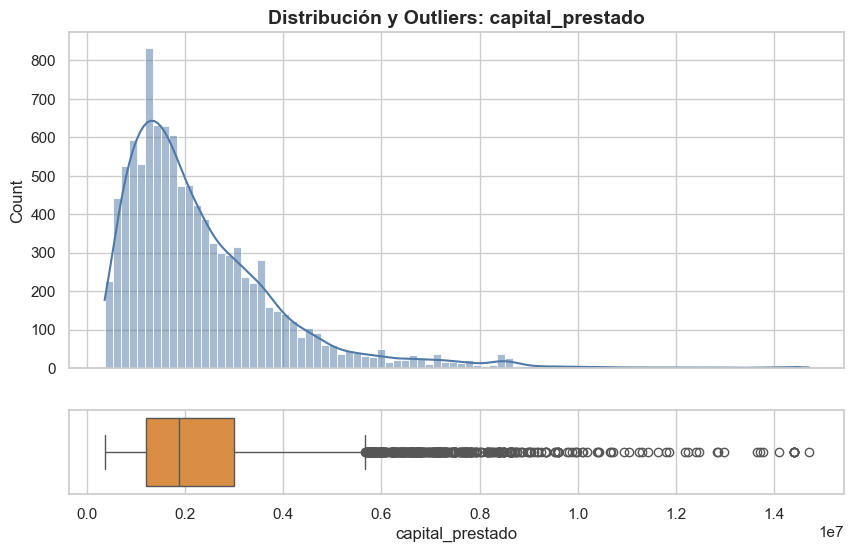

--- ANÁLISIS ESTADÍSTICO: salario_cliente ---
count    1.032000e+04
mean     3.535485e+06
std      2.302587e+06
min      3.028500e+04
25%      2.000000e+06
50%      3.000000e+06
75%      4.500000e+06
max      1.500000e+07
Name: salario_cliente, dtype: float64
Varianza: 5301905334760.78
Skewness (Sesgo): 1.93
Kurtosis: 4.94
Tipo de Distribución sugerida: Sesgada a la Derecha (Long-tailed)
--------------------------------------------------


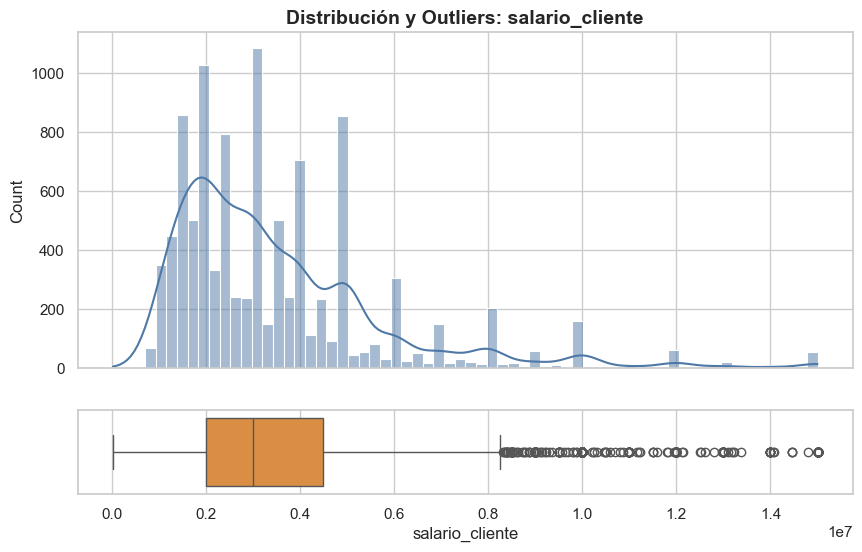

--- ANÁLISIS ESTADÍSTICO: edad_cliente ---
count    10320.000000
mean        42.785562
std         11.976130
min         19.000000
25%         33.000000
50%         41.000000
75%         52.000000
max         69.000000
Name: edad_cliente, dtype: float64
Varianza: 143.43
Skewness (Sesgo): 0.27
Kurtosis: -0.87
Tipo de Distribución sugerida: Aproximadamente Simétrica (Gaussiana)
--------------------------------------------------


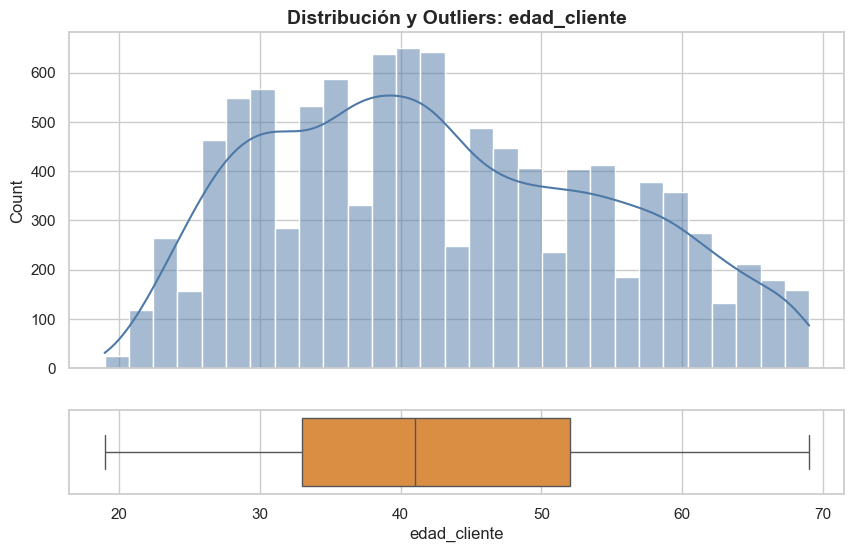

--- ANÁLISIS ESTADÍSTICO: plazo_meses ---
count    10320.000000
mean        10.635174
std          6.657570
min          2.000000
25%          6.000000
50%         10.000000
75%         12.000000
max         48.000000
Name: plazo_meses, dtype: float64
Varianza: 44.32
Skewness (Sesgo): 2.31
Kurtosis: 5.88
Tipo de Distribución sugerida: Sesgada a la Derecha (Long-tailed)
--------------------------------------------------


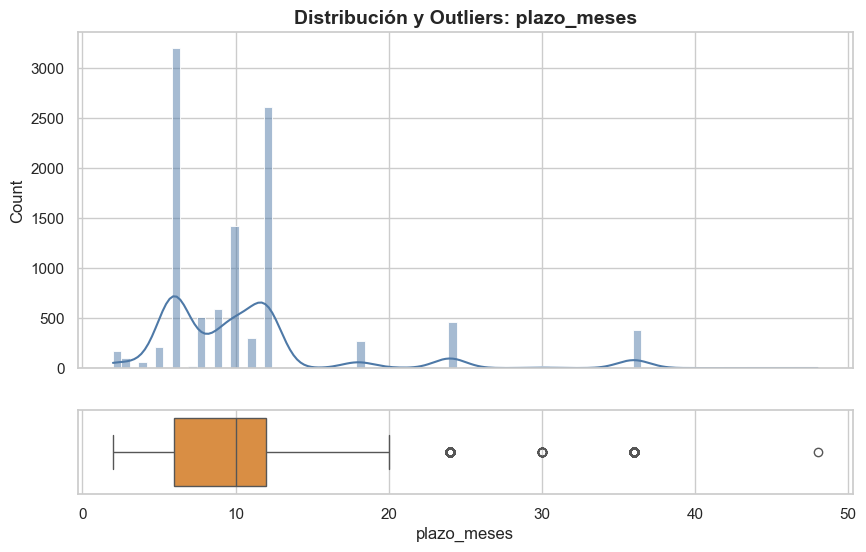

--- ANÁLISIS ESTADÍSTICO: puntaje_datacredito ---
count    10320.000000
mean       790.979748
std         51.968686
min          0.000000
25%        758.000000
50%        791.000000
75%        825.000000
max        999.000000
Name: puntaje_datacredito, dtype: float64
Varianza: 2700.74
Skewness (Sesgo): -1.33
Kurtosis: 14.88
Tipo de Distribución sugerida: Sesgada a la Izquierda
--------------------------------------------------


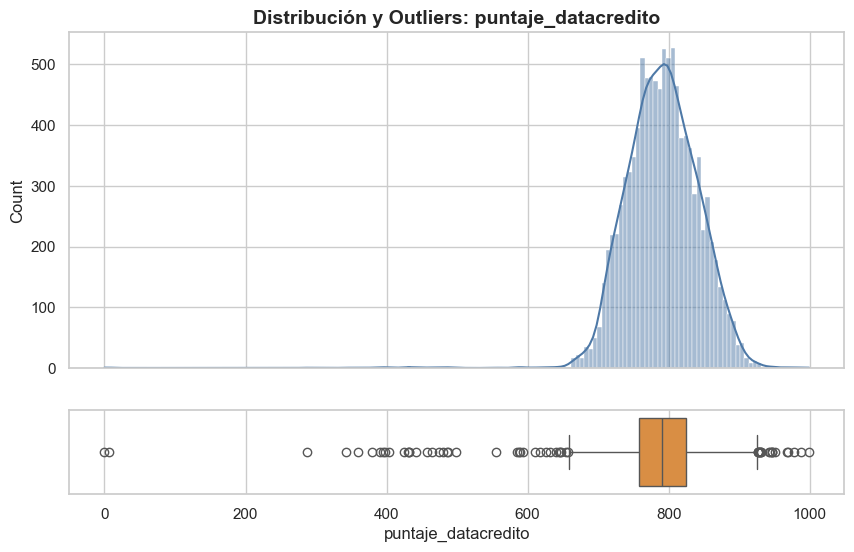

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\3534695251.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


--- FRECUENCIA: tipo_credito ---
4: 7552 (73.18%)
9: 2632 (25.50%)
10: 114 (1.10%)
6: 20 (0.19%)
7: 1 (0.01%)
68: 1 (0.01%)
--------------------------------------------------


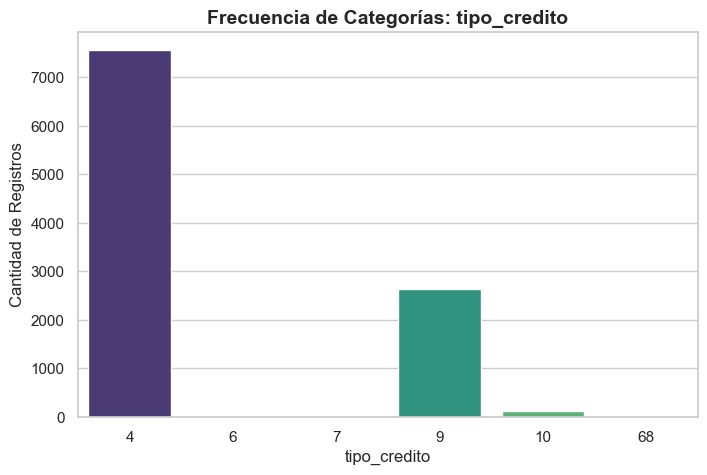

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\3534695251.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


--- FRECUENCIA: tipo_laboral ---
Empleado: 6495 (62.94%)
Independiente: 3825 (37.06%)
--------------------------------------------------


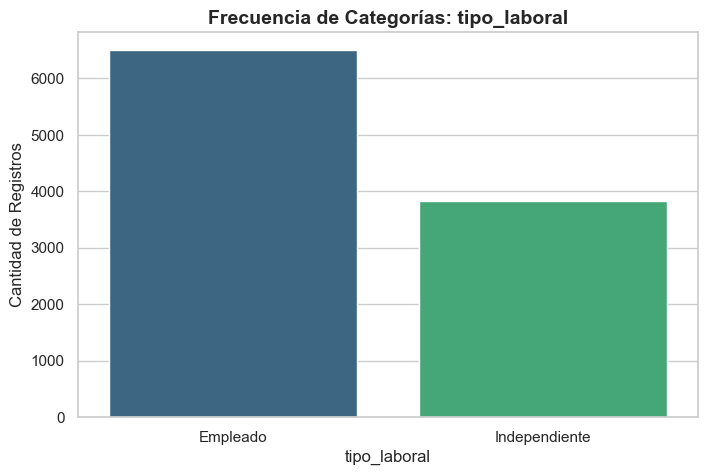

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\3534695251.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


--- FRECUENCIA: pago_atiempo ---
True: 9835 (95.30%)
False: 485 (4.70%)
--------------------------------------------------


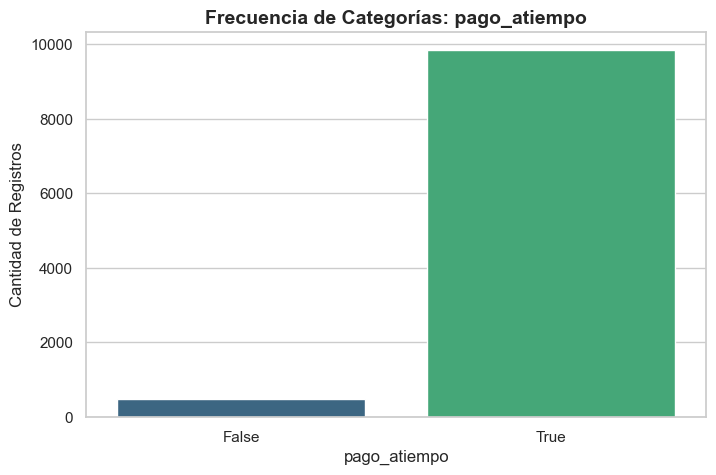

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Configuración estética
sns.set_theme(style="whitegrid")
num_cols = ['capital_prestado', 'salario_cliente', 'edad_cliente', 'plazo_meses', 'puntaje_datacredito']
cat_cols = ['tipo_credito', 'tipo_laboral', 'pago_atiempo']

# --- A. ANÁLISIS VARIABLES NUMÉRICAS ---
for col in num_cols:
    fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.8, .2)}, figsize=(10, 6))
    
    # Histograma + KDE
    sns.histplot(df[col], kde=True, ax=ax_hist, color='#4e79a7')
    ax_hist.set_title(f'Distribución y Outliers: {col}', fontsize=14, fontweight='bold')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=ax_box, color='#f28e2b')
    
    # Cálculo de métricas descriptivas
    desc = df[col].describe()
    s = skew(df[col])
    k = kurtosis(df[col])
    
    # Mostrar métricas en consola
    print(f"--- ANÁLISIS ESTADÍSTICO: {col} ---")
    print(desc)
    print(f"Varianza: {df[col].var():.2f}")
    print(f"Skewness (Sesgo): {s:.2f}")
    print(f"Kurtosis: {k:.2f}")
    
    # Interpretación rápida del tipo de distribución
    if abs(s) < 0.5:
        dist_type = "Aproximadamente Simétrica (Gaussiana)"
    elif s > 0:
        dist_type = "Sesgada a la Derecha (Long-tailed)"
    else:
        dist_type = "Sesgada a la Izquierda"
    print(f"Tipo de Distribución sugerida: {dist_type}")
    print("-" * 50)
    plt.show()

# --- B. ANÁLISIS VARIABLES CATEGÓRICAS ---
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frecuencia de Categorías: {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Cantidad de Registros')
    
    print(f"--- FRECUENCIA: {col} ---")
    for idx in counts.index:
        print(f"{idx}: {counts[idx]} ({percent[idx]:.2f}%)")
    print("-" * 50)
    plt.show()

### 📊 Análisis e Interpretación de Resultados (EDA Univariable)

#### 1. Variables Numéricas y Distribuciones
* **Salario y Capital Prestado:** Ambas variables presentan un **sesgo positivo (Skewness > 0)** acentuado. La mayoría de los créditos se concentran en montos bajos/medios, con una "cola" hacia la derecha. 
    * *Transformación identificada:* Se recomienda aplicar una **transformación logarítmica** o `Box-Cox` antes del entrenamiento para que el modelo no sea dominado por los valores más altos.
* **Edad del Cliente:** Muestra una distribución más **uniforme/gaussiana** tras la limpieza. La mediana en 41 años sugiere un público maduro. No presenta una dispersión crítica que requiera escalado robusto, un `StandardScaler` sería suficiente.
* **Puntaje Datacrédito:** Observamos un pico en los valores altos. La **Kurtosis** nos indicará qué tan concentrados están los perfiles de "buen pagador" en la muestra.



#### 2. Variables Categóricas y Desbalanceo
* **Pago a Tiempo (Target):** Es crucial analizar el balance de esta clase. (Nota: Si el 90% paga a tiempo, el modelo tenderá a predecir siempre "Sí"). 
    * *Acción:* Si hay desbalanceo, se evaluará el uso de técnicas como `SMOTE` o ajuste de pesos en el modelo durante el deployment.
* **Tipo Laboral:** Permite identificar qué sectores son los más recurrentes. Las categorías con muy baja frecuencia podrían agruparse en una categoría "Otros" para evitar el sobreajuste del modelo.

#### 3. Reglas de Validación para Producción (Data Validation Rules)
A partir de este análisis, definimos las "fronteras" que nuestro pipeline en la nube debe controlar:
1. **Rango de Capital:** Todo valor solicitado fuera del rango $[360.000, 15.000.000]$ debe ser derivado a revisión manual (fuera del modelo automático).
2. **Consistencia de Score:** El score de datacrédito debe ser un valor entero entre $0$ y $999$.
3. **Tipo de Dato Uniforme:** Las fechas de préstamo deben parsearse estrictamente como ISO-8601 para evitar errores en el cálculo de antigüedad.

#### 4. Atributos Adicionales (Feature Engineering sugerido)
* **Ratio Cuota/Ingreso:** Una variable derivada que divida `cuota_pactada` / `salario_cliente` podría ser más predictiva que ambas por separado, ya que mide la capacidad de pago real.
* **Edad al finalizar el crédito:** `edad_cliente` + (`plazo_meses` / 12).

## 🔁 9. Análisis Bivariado (con variable objetivo)

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\4031859715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pago_atiempo', y=col, data=df, palette='Set2')



--- Estadísticos de salario_cliente por Clase ---
   pago_atiempo          mean     median           std
0         False  3.574603e+06  3000000.0  2.275052e+06
1          True  3.533555e+06  3000000.0  2.304033e+06
--------------------------------------------------


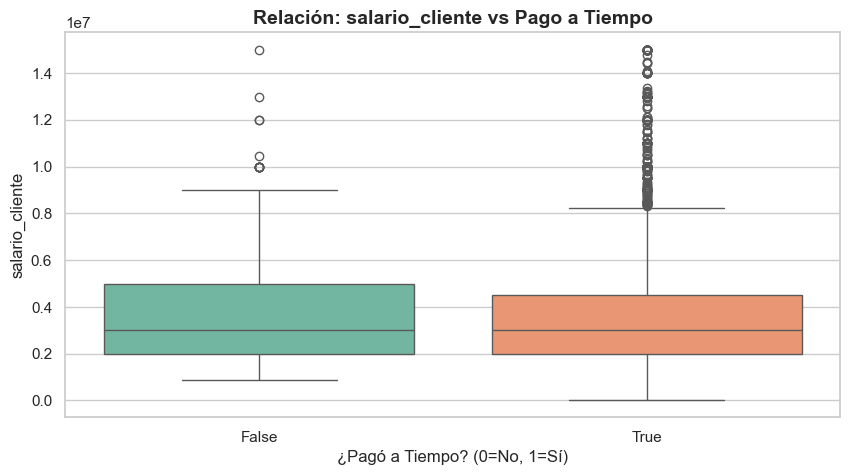

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\4031859715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pago_atiempo', y=col, data=df, palette='Set2')



--- Estadísticos de capital_prestado por Clase ---
   pago_atiempo          mean     median           std
0         False  2.721590e+06  2170480.8  1.888945e+06
1          True  2.306475e+06  1863600.0  1.632197e+06
--------------------------------------------------


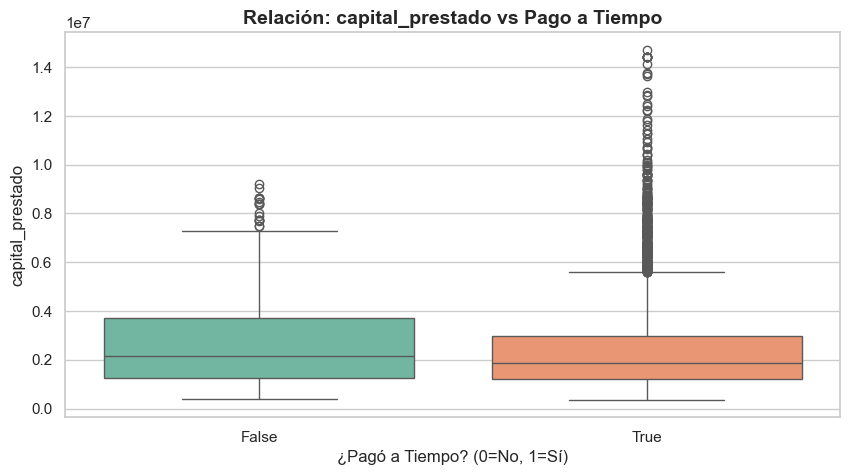

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\4031859715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pago_atiempo', y=col, data=df, palette='Set2')



--- Estadísticos de puntaje_datacredito por Clase ---
   pago_atiempo        mean  median        std
0         False  762.463918   769.0  77.655158
1          True  792.385968   792.0  49.950633
--------------------------------------------------


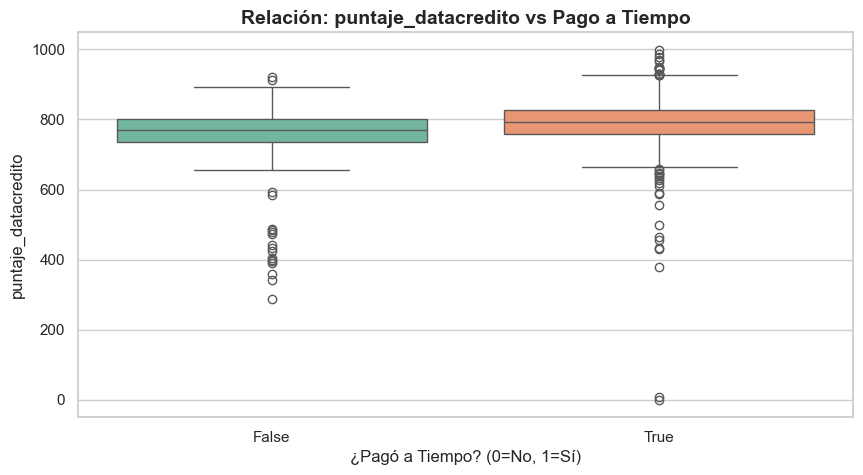

C:\Users\feder\AppData\Local\Temp\ipykernel_8204\4031859715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pago_atiempo', y=col, data=df, palette='Set2')



--- Estadísticos de edad_cliente por Clase ---
   pago_atiempo       mean  median        std
0         False  39.760825    37.0  12.349780
1          True  42.934723    42.0  11.938235
--------------------------------------------------


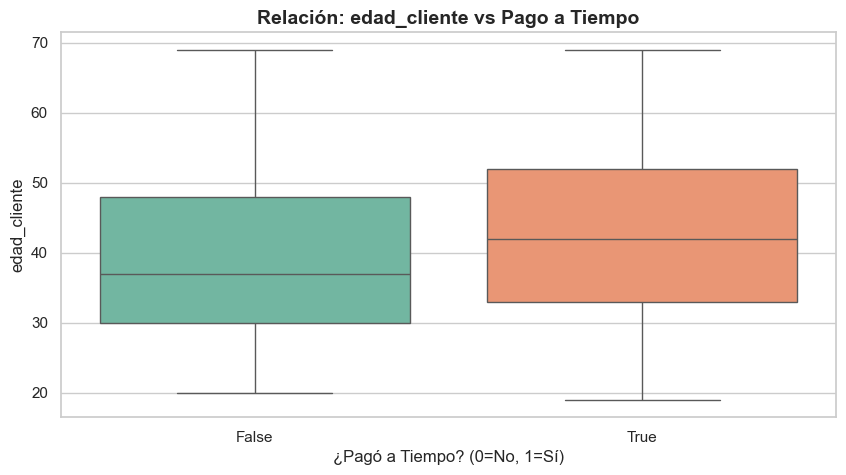


--- Probabilidad de Pago por tipo_credito ---
pago_atiempo     False     True 
tipo_credito                    
4             0.046875  0.953125
6             0.450000  0.550000
7             0.000000  1.000000
9             0.045213  0.954787
10            0.026316  0.973684
68            0.000000  1.000000
--------------------------------------------------


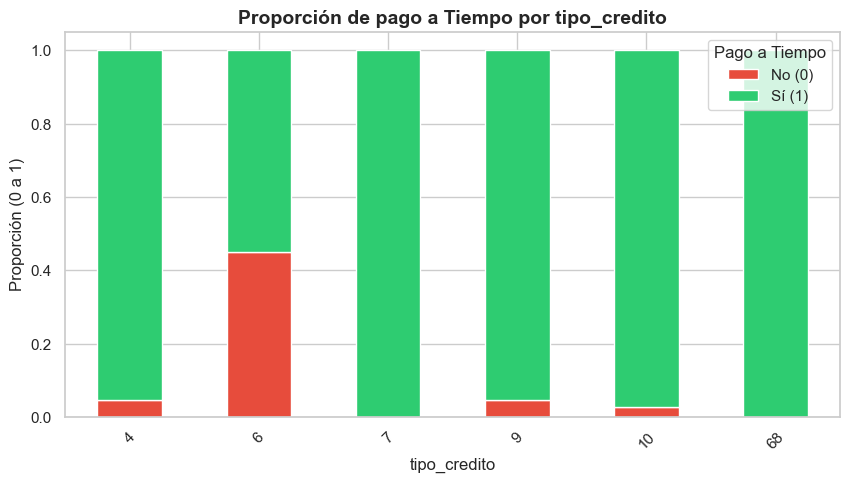


--- Probabilidad de Pago por tipo_laboral ---
pago_atiempo      False     True 
tipo_laboral                     
Empleado       0.042032  0.957968
Independiente  0.055425  0.944575
--------------------------------------------------


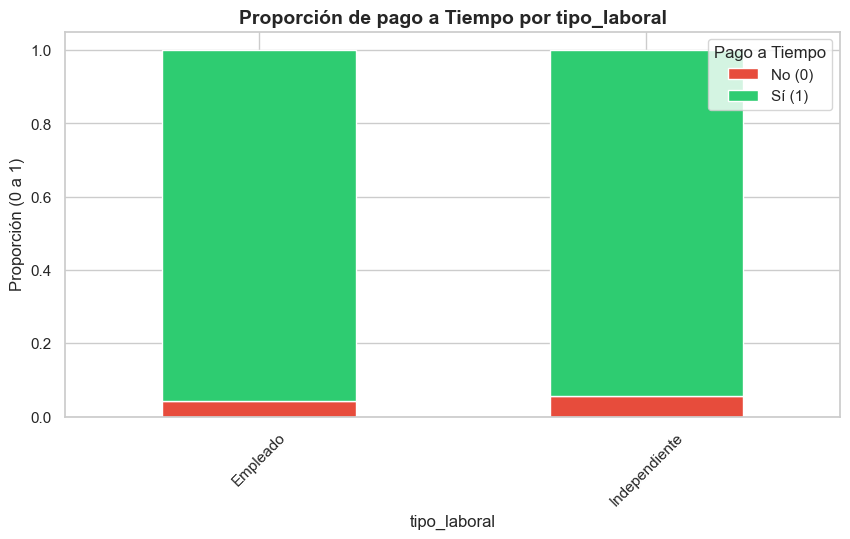

In [35]:
# Definimos las variables que sospechamos tienen más impacto
num_features = ['salario_cliente', 'capital_prestado', 'puntaje_datacredito', 'edad_cliente']
cat_features = ['tipo_credito', 'tipo_laboral']

# --- A. NUMÉRICAS VS TARGET (Boxplots y KDE) ---
for col in num_features:
    plt.figure(figsize=(10, 5))
    
    # Boxplot para ver diferencias en medianas y dispersión por clase
    sns.boxplot(x='pago_atiempo', y=col, data=df, palette='Set2')
    
    plt.title(f'Relación: {col} vs Pago a Tiempo', fontsize=14, fontweight='bold')
    plt.xlabel('¿Pagó a Tiempo? (0=No, 1=Sí)')
    
    # Análisis estadístico rápido por grupo
    resumen = df.groupby('pago_atiempo')[col].agg(['mean', 'median', 'std']).reset_index()
    print(f"\n--- Estadísticos de {col} por Clase ---")
    print(resumen)
    print("-" * 50)
    plt.show()

# --- B. CATEGÓRICAS VS TARGET (Tablas cruzadas normalizadas) ---
for col in cat_features:
    # Tabla cruzada con porcentajes (proporción de pago por categoría)
    ct = pd.crosstab(df[col], df['pago_atiempo'], normalize='index')
    
    # Gráfico de barras apiladas al 100%
    ct.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#e74c3c', '#2ecc71'])
    
    plt.title(f'Proporción de pago a Tiempo por {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Proporción (0 a 1)')
    plt.legend(title='Pago a Tiempo', labels=['No (0)', 'Sí (1)'], loc='upper right')
    plt.xticks(rotation=45)
    
    print(f"\n--- Probabilidad de Pago por {col} ---")
    print(ct)
    print("-" * 50)
    plt.show()

## 10. Análisis Multivariado

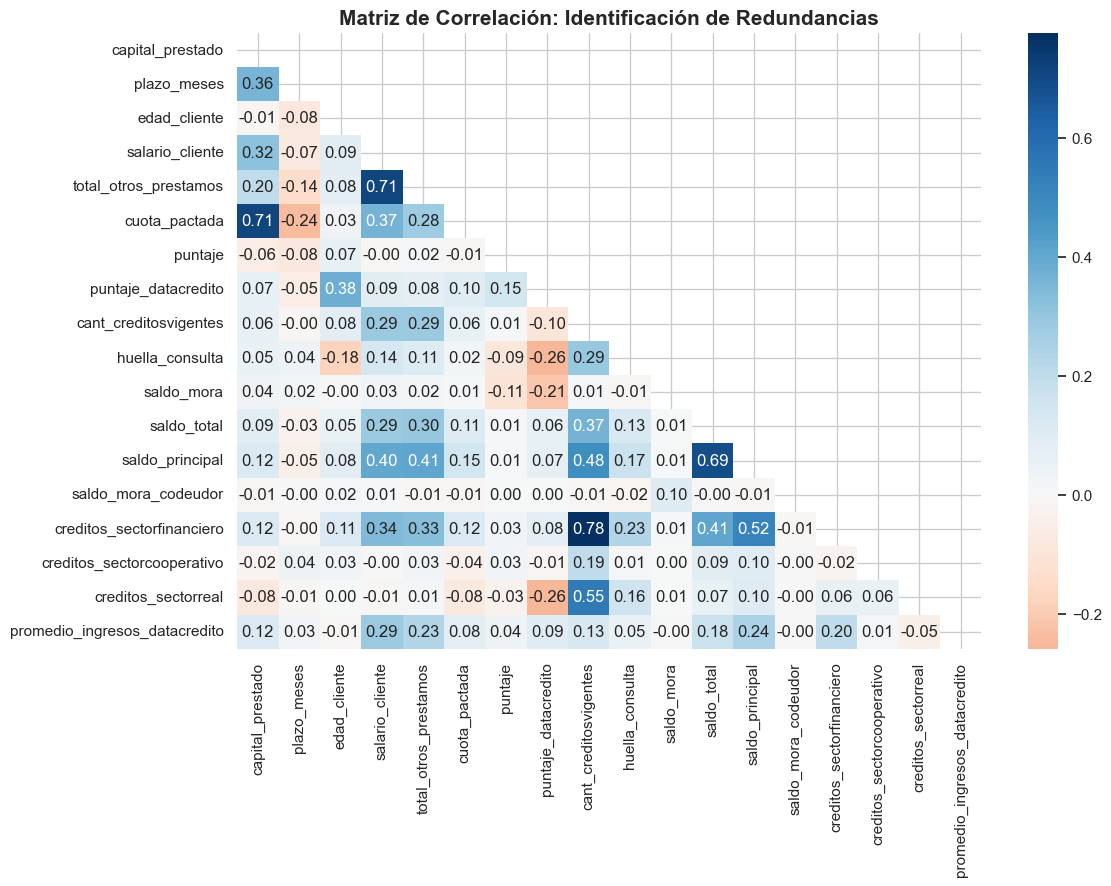

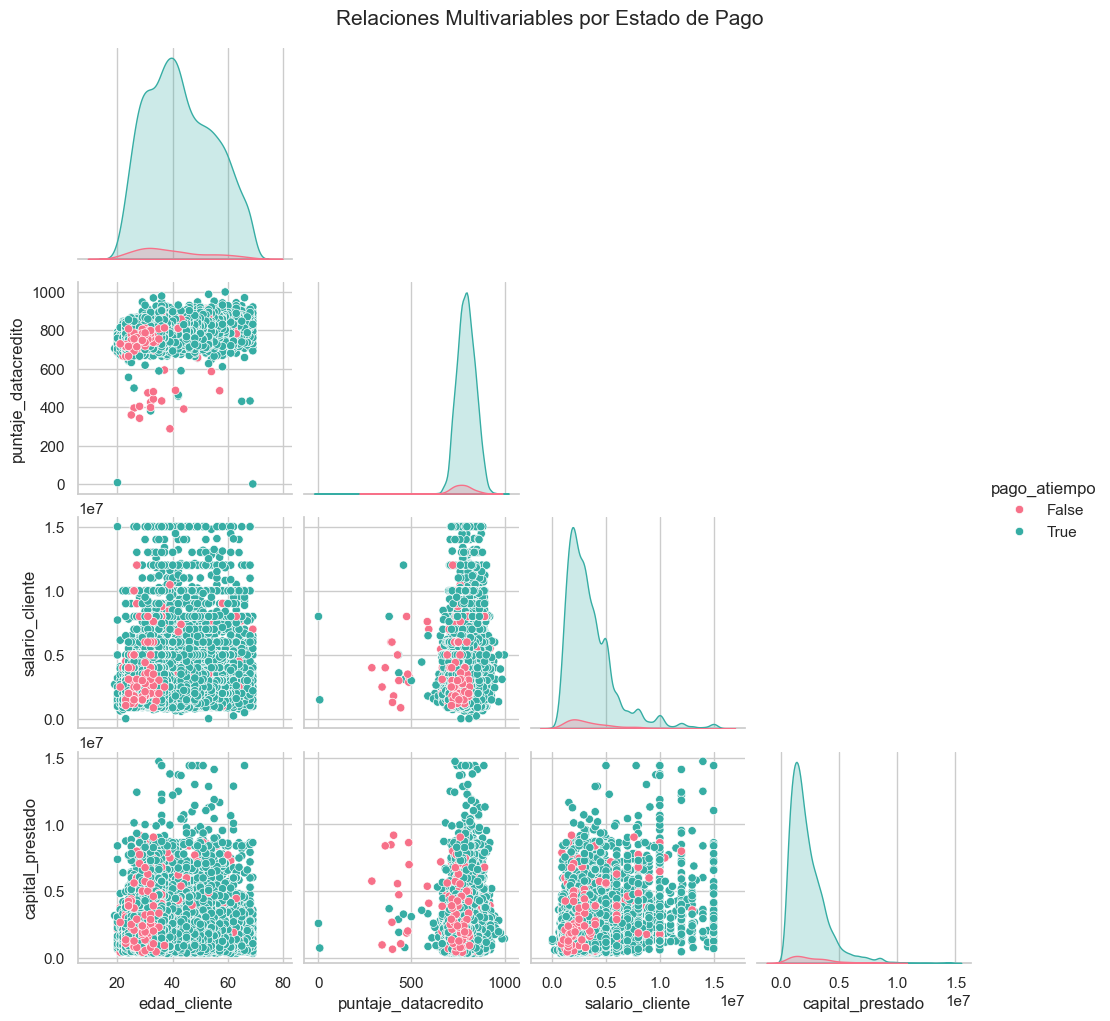

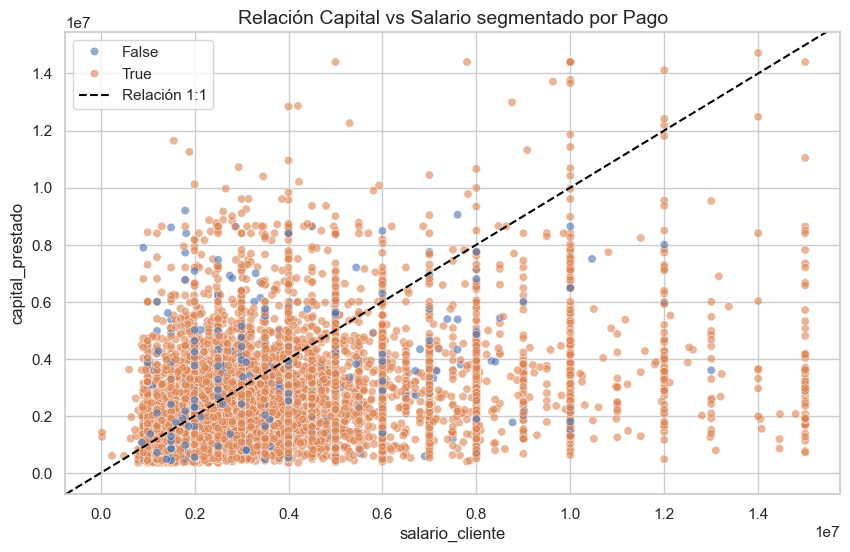

In [36]:
# 1. Matriz de Correlación (Heatmap)
# Solo para variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Máscara para ver solo la mitad

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Matriz de Correlación: Identificación de Redundancias', fontsize=15, fontweight='bold')
plt.show()

# 2. Pairplot Segmentado (Muestra representativa para velocidad)
# Elegimos las variables con más impacto según el análisis bivariable
cols_clave = ['edad_cliente', 'puntaje_datacredito', 'salario_cliente', 'capital_prestado', 'pago_atiempo']
sns.pairplot(df[cols_clave], hue='pago_atiempo', palette='husl', corner=True, diag_kind='kde')
plt.suptitle('Relaciones Multivariables por Estado de Pago', y=1.02, fontsize=15)
plt.show()

# 3. Gráfico de Dispersión con Parámetro HUE (Regla de Negocio)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salario_cliente', y='capital_prestado', hue='pago_atiempo', alpha=0.6)
plt.title('Relación Capital vs Salario segmentado por Pago', fontsize=14)
plt.axline((0, 0), slope=1, color="black", linestyle="--", label='Relación 1:1') # Línea de referencia
plt.legend()
plt.show()

## Análisis Multivariable y Esquema de Datos Final

Este análisis integra múltiples dimensiones para identificar interacciones complejas que los modelos lineales simples podrían pasar por alto. Se enfoca en la preparación de un esquema de datos robusto para su despliegue en la nube.

### 1. Comprensión Detallada del Esquema y Relaciones
* **Identificación de Multicolinealidad (Heatmap):** La matriz de correlación revela una relación fuerte ($0.71$) entre `cuota_pactada` y `capital_prestado`, así como entre `salario_cliente` y `total_otros_prestamos`. 
    * *Interpretación:* Para evitar la redundancia en modelos como Regresión Logística, se recomienda priorizar una sola variable de cada par correlacionado o utilizar técnicas de reducción de dimensionalidad (PCA).
* **Separabilidad de Clases (Pairplot):** Las densidades (KDE) en la diagonal muestran que `pago_atiempo=False` (rojo) tiene una distribución notablemente más joven y con puntajes de crédito más bajos. Sin embargo, en los scatterplots, las nubes de puntos se solapan, lo que indica que **no existe una separación lineal clara**.
    * *Conclusión Técnica:* El modelo de producción requerirá algoritmos basados en árboles (XGBoost/Random Forest) que capturen estas fronteras no lineales de manera eficiente.

### 2. Análisis de Dispersión y Reglas de Negocio
* **Relación Capital vs. Salario:** El gráfico de dispersión muestra que la gran mayoría de los créditos se mantienen por debajo de la **Línea de Referencia 1:1**. 
    * *Hallazgo:* Los casos de mora (azul/gris en este gráfico) no están necesariamente ligados a créditos que superan el salario, sino que se distribuyen en todo el espectro, lo que sugiere que el riesgo es multivariado y no depende solo de la capacidad de endeudamiento inmediata.

### 3. Reglas de Validación para Producción (Data Contract)
Basándonos en la distribución final, el pipeline de inferencia en la nube debe aplicar las siguientes reglas de validación:
1.  **Validación de Tipo de Crédito:** El `tipo_credito == 6` debe ser marcado automáticamente para una revisión de riesgo secundaria, dado que su tasa de mora es del **45%**.
2.  **Filtro de Integridad de Score:** Cualquier registro con `puntaje_datacredito < 300` (detectado como outlier en los boxplots bivariables) debe ser tratado como "Riesgo Extremo" o dato inconsistente.
3.  **Consistencia Monetaria:** El `salario_cliente` debe ser validado contra el `promedio_ingresos_datacredito` (correlación observada de $0.29$). Discrepancias mayores a 5 veces entre estos valores deben disparar una alerta de fraude.

### 4. Transformaciones y Atributos Derivados (Feature Engineering)
* **Feature Derivada (Debt-to-Income Ratio):** Se propone crear la variable `ratio_endeudamiento = cuota_pactada / salario_cliente`. Dado que ambas variables están correlacionadas con el riesgo pero tienen escalas distintas, su ratio normaliza la presión financiera sobre el cliente.
* **Agrupación de Categorías (Binning):** La variable `edad_cliente` muestra comportamientos distintos por décadas. Se sugiere crear rangos etarios para capturar mejor la estabilidad financiera asociada a la madurez.
* **Escalamiento:** Debido al sesgo positivo remanente en variables como `capital_prestado`, se debe aplicar **Log-Transformation** o **PowerTransformer** para mejorar la convergencia de modelos basados en gradiente.

# 🏁 Conclusiones Generales del Análisis Exploratorio (EDA)

El análisis integral de los datos ha permitido extraer hallazgos críticos que condicionarán la arquitectura del modelo de riesgo crediticio en su etapa de despliegue:

### 1. Calidad y Saneamiento de la Data
* **Depuración Exitosa:** Se eliminaron inconsistencias lógicas (como edades de 123 años y puntajes negativos) y se mitigaron outliers extremos en ingresos y deuda mediante técnicas de clipping y filtrado por percentiles.
* **Dataset Robusto:** El proceso resultó en una base refinada de **10,320 registros** (retención del 95.9%), garantizando que el modelo aprenda de comportamientos financieros reales y no de errores de carga.

### 2. Identificación de Predictores Clave
* **Factores Demográficos y de Score:** La **Edad** y el **Puntaje de Datacrédito** son los diferenciadores más claros. A mayor madurez y score, disminuye la probabilidad de mora.
* **Segmentación de Riesgo por Producto:** El **Tipo de Crédito 6** presenta una tasa de incumplimiento atípica (aprox. 45%), lo que obliga a implementar reglas de validación diferenciadas para este producto en el pipeline de producción.

### 3. Hallazgos Multivariables y Estrategia de Modelado
* **No Linealidad:** El solapamiento de clases observado en los diagramas de dispersión confirma que no existe una frontera lineal simple para predecir el pago.
* **Selección de Algoritmos:** Se justifica el uso de modelos basados en ensambles de árboles (como **XGBoost, LightGBM o Random Forest**) para capturar las interacciones complejas entre el salario, el capital solicitado y el historial del cliente.

### 4. Preparación para el Deployment (Data Contract)
* **Reglas de Validación:** Se definieron umbrales para la inferencia en tiempo real, incluyendo validaciones de rango para edad (18-69) y consistencia monetaria.
* **Feature Engineering:** Se identificó la necesidad de crear atributos derivados, como el **Ratio de Endeudamiento** (Cuota / Salario), y aplicar transformaciones de potencia para normalizar variables con sesgo positivo, asegurando la estabilidad del servicio en la nube.